In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("data\StudentPerformanceFactors.csv")

In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [10]:
print(df['Teacher_Quality'].unique())
print(df['Parental_Education_Level'].unique())
print(df['Distance_from_Home'].unique())

['Medium' 'High' 'Low' nan]
['High School' 'College' 'Postgraduate' nan]
['Near' 'Moderate' 'Far' nan]


In [11]:
print(df['Teacher_Quality'].value_counts())
print("_______________________________")
print(df['Parental_Education_Level'].value_counts())
print("_______________________________")
print(df['Distance_from_Home'].value_counts())

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
_______________________________
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
_______________________________
Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64


In [12]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [13]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

In [34]:
numerical_cols

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

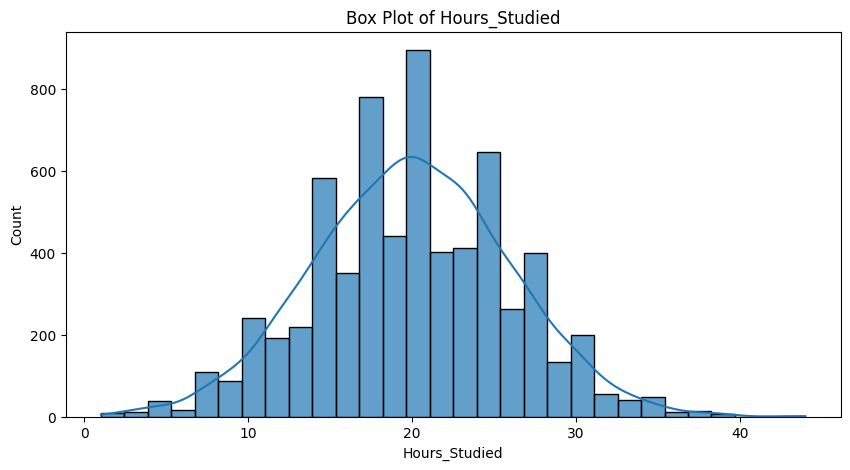

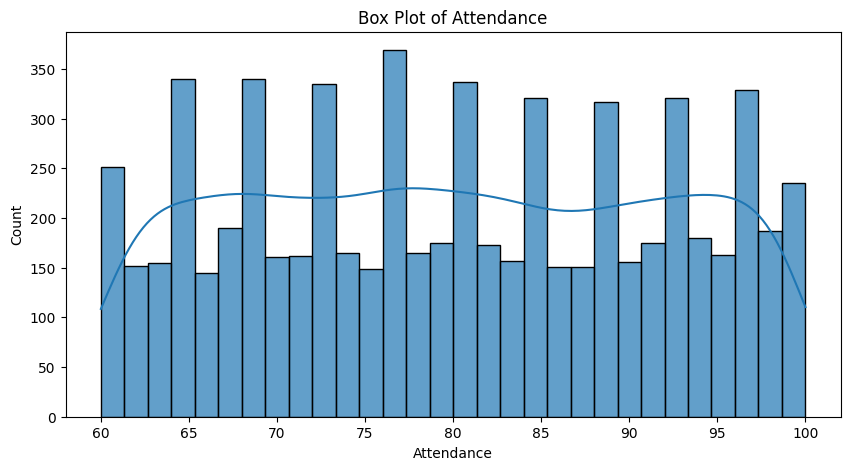

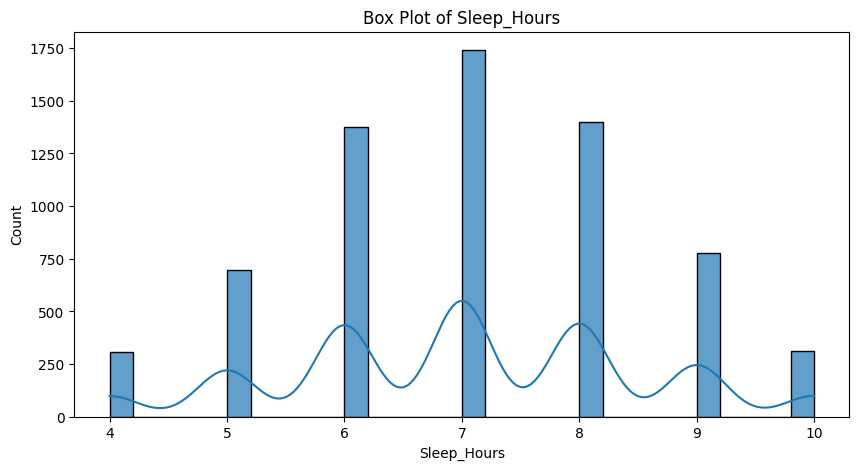

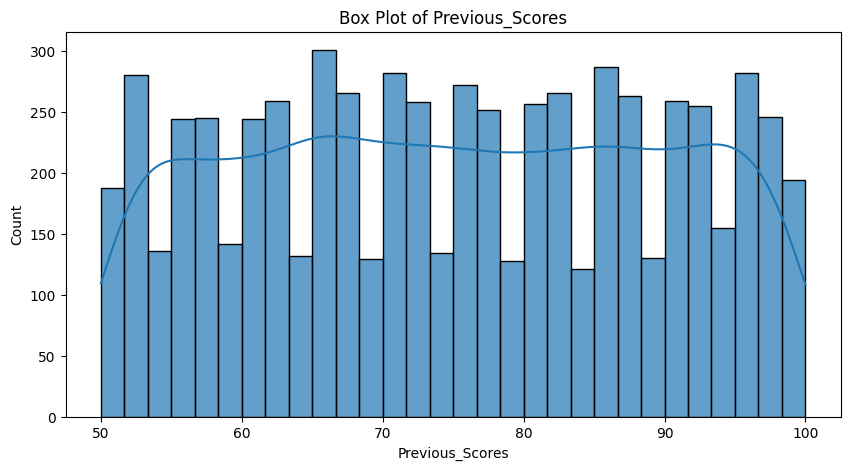

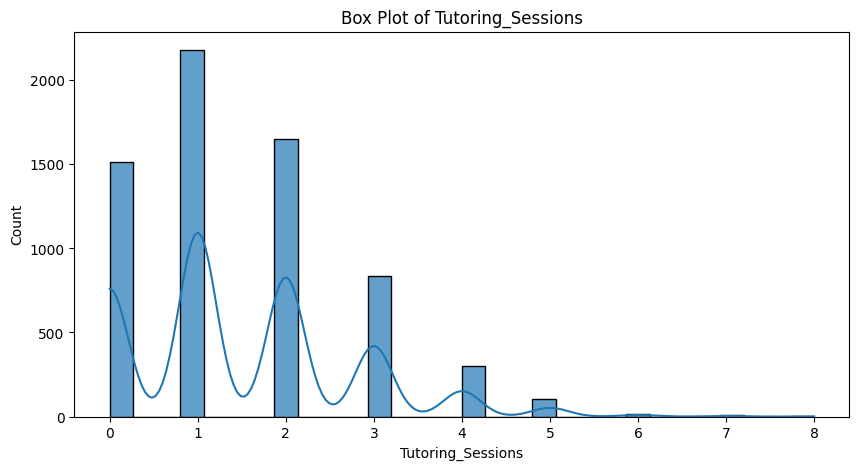

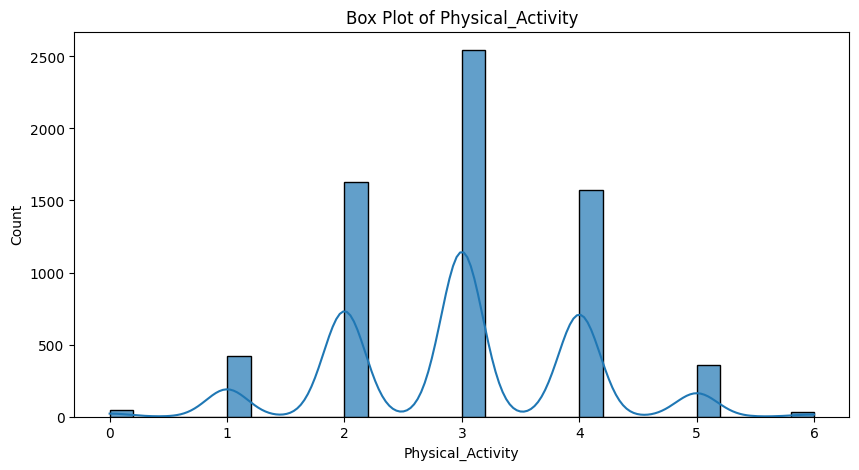

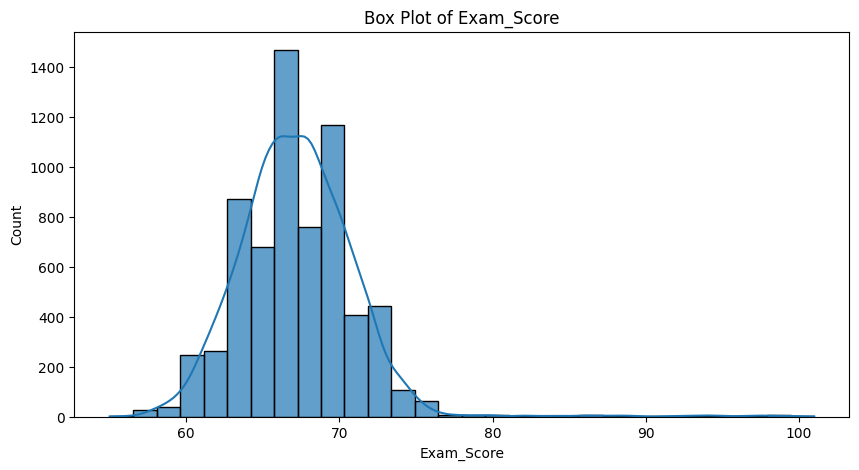

In [18]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, edgecolor='black',kde=True ,alpha=0.7)
    plt.title(f'Box Plot of {col}')
    plt.show()

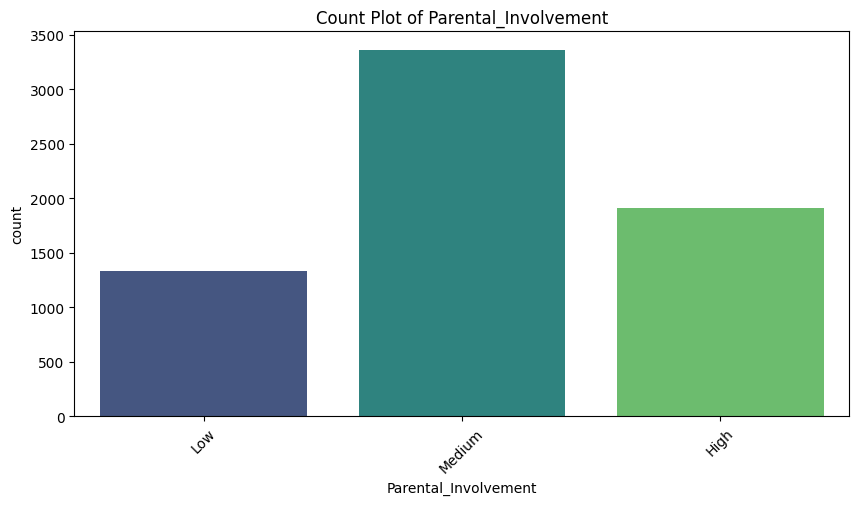

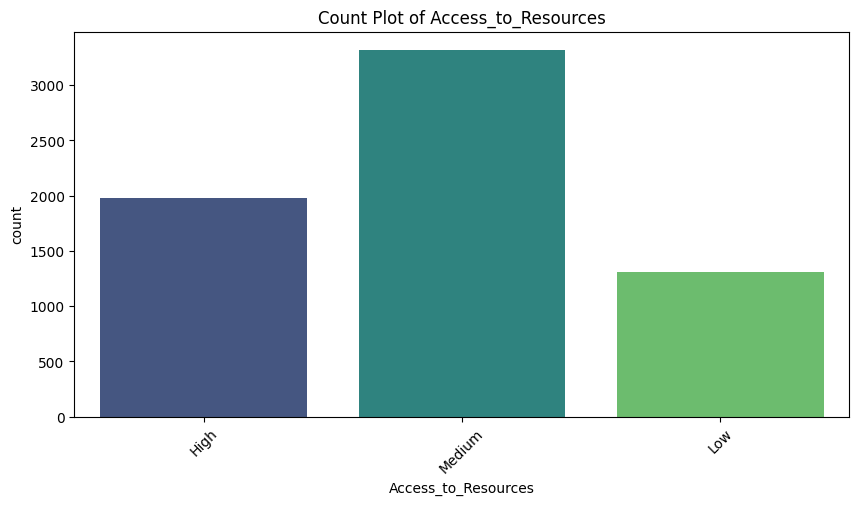

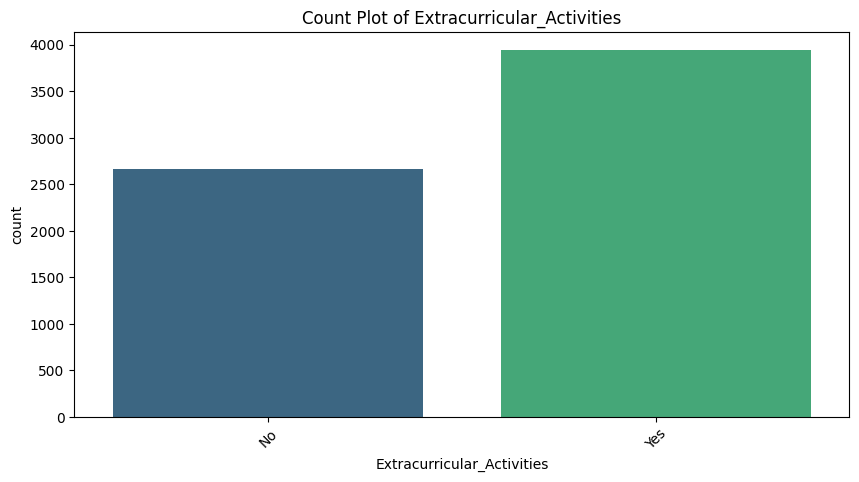

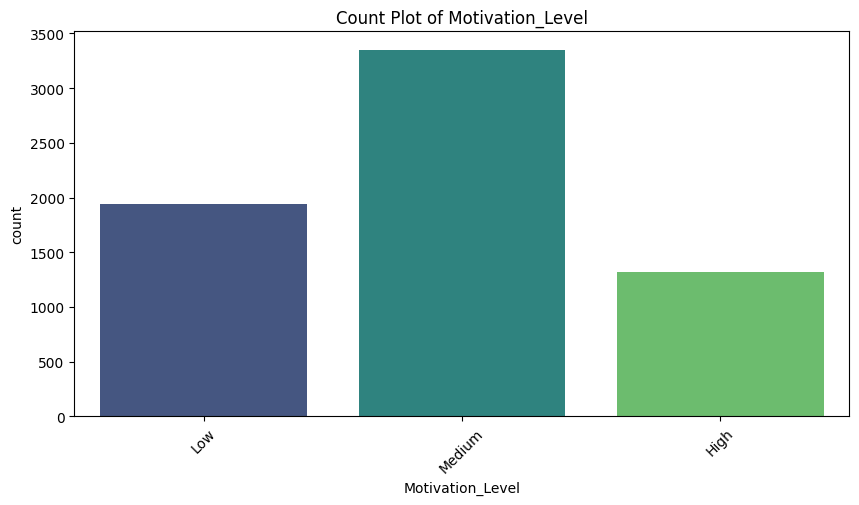

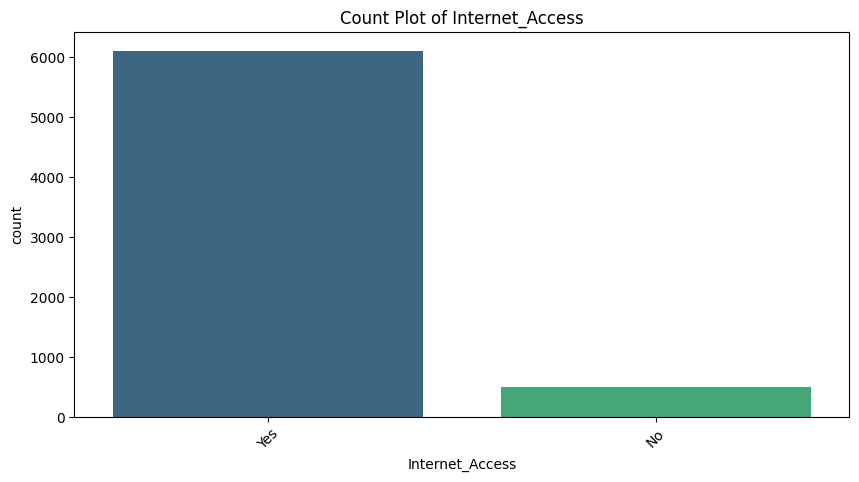

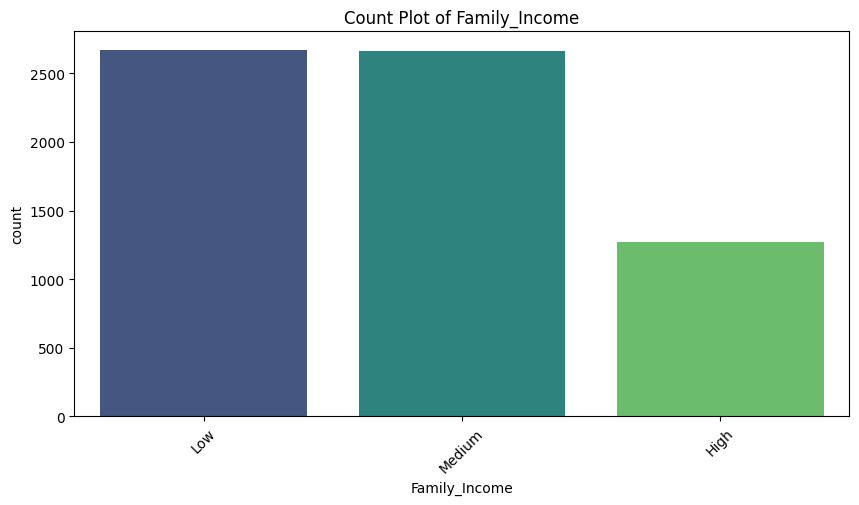

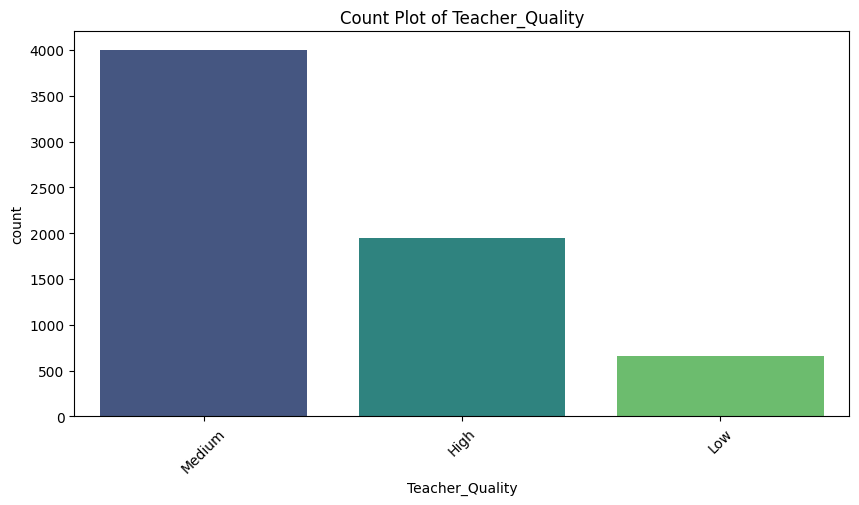

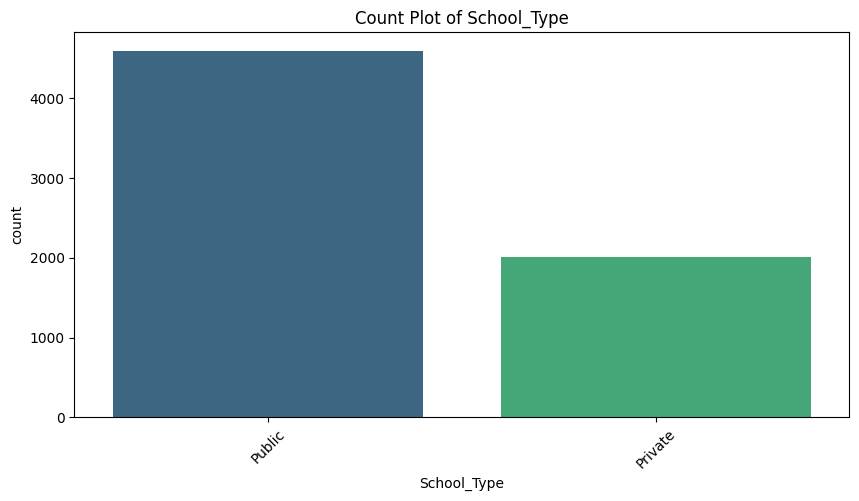

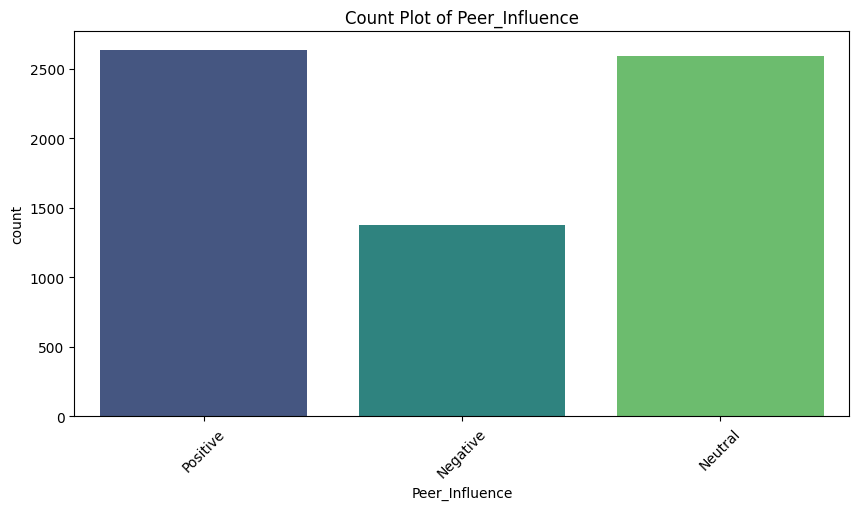

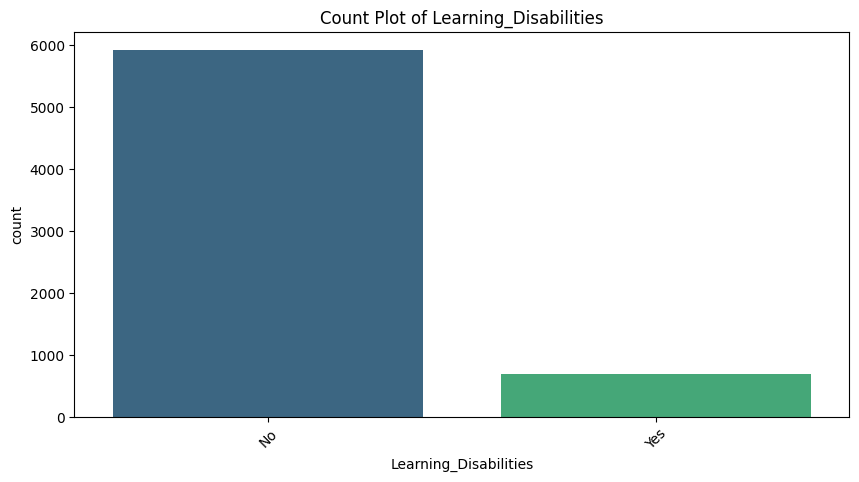

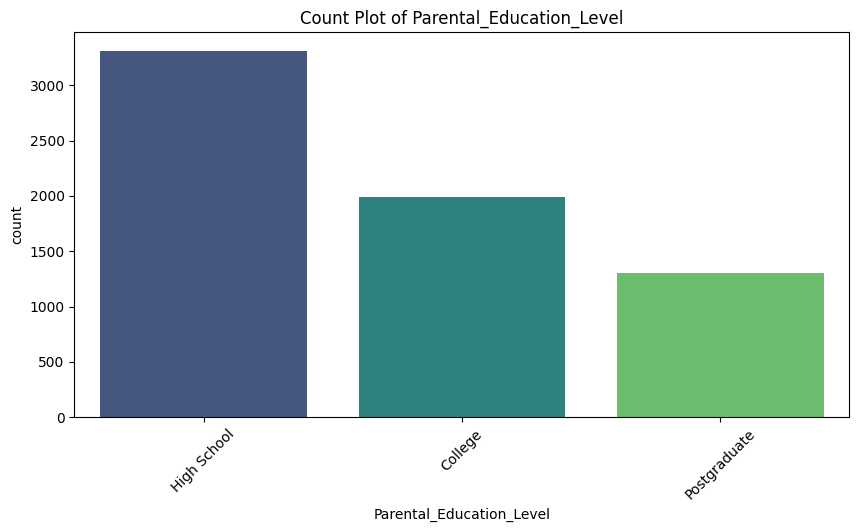

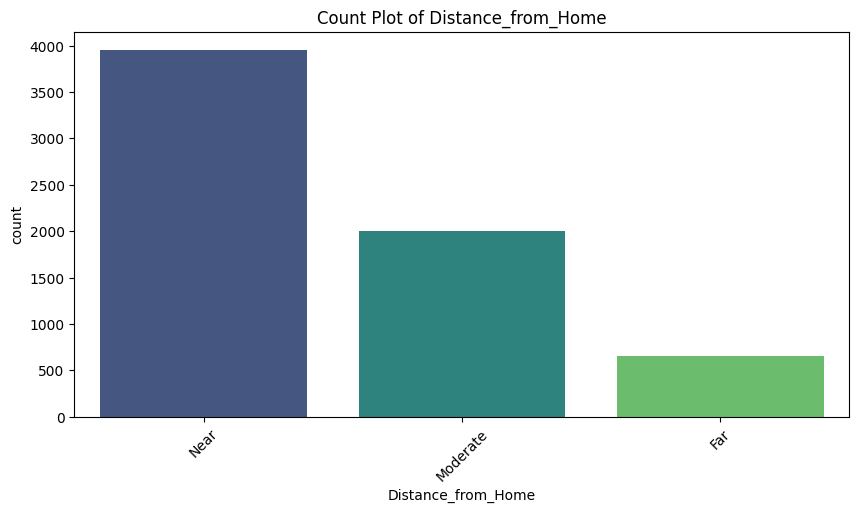

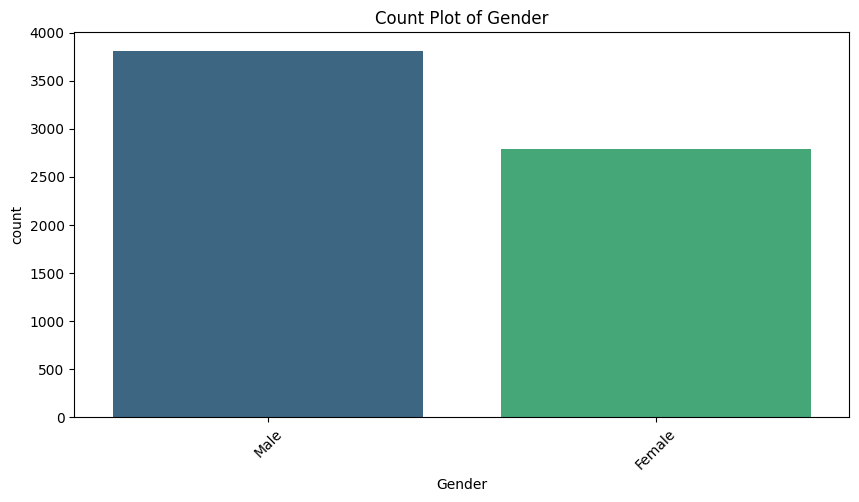

In [19]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

<Axes: >

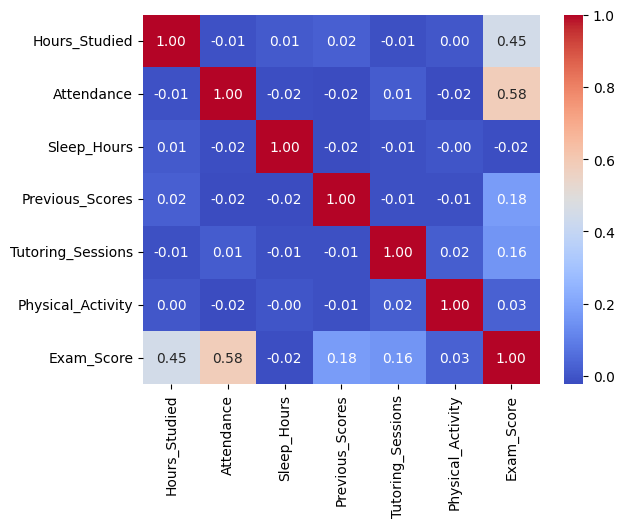

In [20]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [23]:
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        print(f"Outliers detected in {col}:")
        print(outliers[[col]].head())
    else:
        print(f"No outliers detected in {col}.")

Outliers detected in Hours_Studied:
      Hours_Studied
209              43
262               1
478              38
1061              3
1101              3
No outliers detected in Attendance.
No outliers detected in Sleep_Hours.
No outliers detected in Previous_Scores.
Outliers detected in Tutoring_Sessions:
     Tutoring_Sessions
10                   4
76                   4
82                   5
124                  4
129                  4
No outliers detected in Physical_Activity.
Outliers detected in Exam_Score:
     Exam_Score
94          100
106          76
113          79
209          78
217          89


In [32]:
from scipy.stats import f_oneway

for col in categorical_cols:
    groups = [df[df[col] == level]['Exam_Score'] for level in df[col].unique()]
    
    # Only test if there are at least 2 groups
    if len(groups) > 1:
        f_stat, p_value = f_oneway(*groups)
        print(f"ANOVA test for {col} vs Exam_Score: F={f_stat:.2f}, p-value={p_value:.4f}")
        if p_value < 0.05:
            print(f"{col} is significantly associated with Exam_Score.\n")
        else:
            print(f"{col} is not significantly associated with Exam_Score.\n")


ANOVA test for Parental_Involvement vs Exam_Score: F=84.49, p-value=0.0000
Parental_Involvement is significantly associated with Exam_Score.

ANOVA test for Access_to_Resources vs Exam_Score: F=98.00, p-value=0.0000
Access_to_Resources is significantly associated with Exam_Score.

ANOVA test for Extracurricular_Activities vs Exam_Score: F=27.49, p-value=0.0000
Extracurricular_Activities is significantly associated with Exam_Score.

ANOVA test for Motivation_Level vs Exam_Score: F=25.72, p-value=0.0000
Motivation_Level is significantly associated with Exam_Score.

ANOVA test for Internet_Access vs Exam_Score: F=17.55, p-value=0.0000
Internet_Access is significantly associated with Exam_Score.

ANOVA test for Family_Income vs Exam_Score: F=29.79, p-value=0.0000
Family_Income is significantly associated with Exam_Score.

ANOVA test for Teacher_Quality vs Exam_Score: F=20.11, p-value=0.0000
Teacher_Quality is significantly associated with Exam_Score.

ANOVA test for School_Type vs Exam_Sco